<h1>Which Movie Rating is This Movie?</h1>
<h4><i>By Kyoosik Kim</i></h4>

------

### Exploratory Analysis of Movie Data
There are largely five types of movie ratings according to [Motion Picture Association](https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system) of America film rating system; G, PG, PG-13, R, NC-17. My question for this project is how these ratings are *associated* with features of movies. The features I intend to investigate include not only standard features such as box office gross, duration, or budget but also flexible features such as IMDB score or Facebook likes. For the study, I procured a data set titled [Movie Rating Prediction](https://github.com/sundeepblue/movie_rating_prediction) which the author collected and created mainly using python framework [scrapy](https://scrapy.org/).

The original data set has total 28 columns, but they will be selected and processed to be less than the original for the purpose of exploring the data set as simply as possible. After processing the data, I will divide them into numerical and categorical variables. This is for only numerical variables to be on pair plots, however, all the selected variables including categorical ones will be on a heat map of correlations. The pair plots and the heat map will make it easier to find any patterns that differ content ratings. Box plots will be used too in the course. Finally, I will filter the correlations between content ratings and other features in order to express the association quantitatively.

Since the goal of this project is to find correlations and study them, it would be a good idea to brush up the relevant statistics at somewhere like [here](https://www.analyticsvidhya.com/blog/2015/06/correlation-common-questions/).

------
### Load and Explore

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
movie_df = pd.read_csv("../Data/movie_metadata.csv_movie_metadata.csv")
print("column x row:", movie_df.shape)

column x row: (5043, 28)


The three functions give an overall idea of the data set as follows.

* *Head*: shows the first 5 rows by default
* *Info*: list of all columns and their data types
* *Describe*: table of min, max, quantile, mean, median for numerical columns

I will start with '.head()' to see the data set's shape, and then '.info()' to check the data types and missing values, finally '.describe()' to have general ideas of the distribution of individual numerical columns. The results of '.head()' and '.info()' are very telling without having to guess too much.

In [3]:
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


The variables have distinctively different ranges. For example, 'num_critic_for_reviews' is between 1 to 813 counts while budget is up to 1,221,550,000 dollars. I might consider scailing values that come from different units, but I do not need it because I focus on only finding meaningful correlations and there is no modeling involved in this project which could benefit from normalization. More information regarding this issue can be found in [this Quora post](https://www.quora.com/Why-do-we-normalize-the-data) and [this Yale webpage](http://www.stat.yale.edu/Courses/1997-98/101/correl.htm).

------
### Select Variables

There are a few name related attributes such as director names or actor names. Even though these are legitimate categorical data, there are too many kinds of them to be properly used. Some numerical data have redundancy, more precisely, the several facebook likes attributes are already highly correlated because one is likely to be the aggregate another likes'. Also, I drop 'NaN' values so I can analyze the data as it were first.

In [6]:
# handle names and likes
drop_columns = [x for x in list(movie_df.columns) if x[-4:] == "name" or x[-5:] == "likes"]
drop_columns.remove('movie_facebook_likes')

movie_df.drop(columns=drop_columns, inplace=True)
movie_df.dropna(inplace=True)

# set apart numerical and categorical
num_columns = list(movie_df.select_dtypes(include=['int64', 'float64']).columns)
cate_columns = [x for x in list(movie_df.columns) if not x in num_columns]

print("New column x row:", movie_df.shape, "\n")
print("Numerical columns:", num_columns, "\n")
print("Categorical columns:", cate_columns)

New column x row: (3761, 19) 

Numerical columns: ['num_critic_for_reviews', 'duration', 'gross', 'num_voted_users', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes'] 

Categorical columns: ['color', 'genres', 'movie_title', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']


Now, about 1,200+ rows and 9 columns are gone. 11 of the columns look okay for now, but 8 of the categorical columns seem to need a further investigation. Some of them could still have the same problem as name columns. As it turns out below, 'genres', 'plot_keywords', and 'movie_imdb_link' have just too many kinds. It does not seem like they can be used to group observations as a categorical attribute. 'movie_imdb_link' is virtually no meaning, however, 'genres' and 'plot_keywords' seem to have a lot of potential usage if a natural language process is done to them. Nonetheless, I will not use them at this point of time.

In [7]:
"""
Print unique values of categorical columns
"""
def count_category(col_name):
    num = len(set(movie_df[col_name]))
    print("Number of different", col_name, ":", num)
    return num

drop_cate_columns = []
for col_name in cate_columns:
    if count_category(col_name) > 50:
        drop_cate_columns.append(col_name)

Number of different color : 2
Number of different genres : 745
Number of different movie_title : 3660
Number of different plot_keywords : 3661
Number of different movie_imdb_link : 3661
Number of different language : 34
Number of different country : 45
Number of different content_rating : 12


'content_rating' is set as the dependent variable which I am concerned with. I set it aside from the categorical columns list. Now, the list has three attributes remaining; 'color', 'language', 'country'.

In [8]:
cate_columns = [x for x in cate_columns if not x in drop_cate_columns]
cate_columns.remove('content_rating') # dependent variable
movie_df.drop(columns=drop_cate_columns, inplace=True)

'aspect_ratio' is the ratio of the width and the height of a screen. I suspect that this could be categorical because there is probably only a limited kinds of screens being produced. The code below reveals it and also proves that the ratio of 1.85 and 2.35 are the most popular. I now set it into the categorical data columns so I can accordingly process them later on.

In [9]:
key, value = np.unique(movie_df['aspect_ratio'], return_counts=True)
print("(aspect_ratio, counts):", tuple(zip(key, value)))

(aspect_ratio, counts): ((1.18, 1), (1.33, 18), (1.37, 50), (1.5, 1), (1.66, 39), (1.75, 2), (1.77, 1), (1.78, 34), (1.85, 1591), (2.0, 3), (2.2, 11), (2.24, 1), (2.35, 1990), (2.39, 11), (2.4, 3), (2.55, 1), (2.76, 3), (16.0, 1))


In [10]:
# fix error
movie_df[movie_df['aspect_ratio'] == 16]['aspect_ratio'] = 1.6

# move aspect_ratio
num_columns.remove('aspect_ratio')
cate_columns.append('aspect_ratio')

------
### Process Categorical Variables

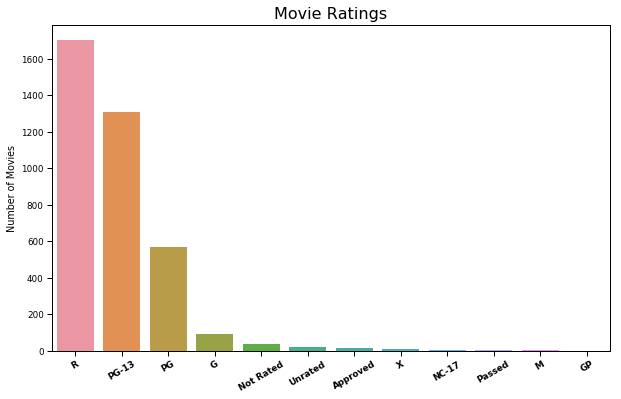

In [11]:
plt.figure(figsize=(10, 6))
plt.title("Movie Ratings", fontsize=16)
plt.ylabel("Number of Movies")
plt.xticks(rotation=30, fontweight='bold')

rating_count = movie_df['content_rating'].value_counts()
sns.barplot(rating_count.index, rating_count.values)

The rating 'R' is dominant followed by 'PG-13' and 'PG'. While 'G' and 'NC-17' are rare, there are some other types of ratings than the five aforementioned such as 'X', 'M', and 'GP' which are merely due to [historical changes](https://lasr.cs.ucla.edu/reiher/film_miscellany/ratings.html) and I can easily match them to the standard. As for the rest, I will set them together with 'NC-17' because it is believed that chances are high that movies not properly rated would have graphic scenes.

In [12]:
"""
Read content ratings and group them into 5 ratings.
Some minor ratings are grouped with NC-17.
"""
def process_rating(rating):
    dict_rating = {
        'G': ['G'],
        'PG': ['PG', 'M', 'GP'],
        'PG-13': ['PG-13'],
        'R': ['R'],
        'NC-17_others': ['NC-17', 'Not Rated', 'Unrated', 'Approved', 'X', 'Passed']
    }
    
    for key, val_list in dict_rating.items():
        if rating in val_list:
            return key

Before processing the categorical data, 'language' and 'country' have not been checked yet. From taking a brief look at the data frame, they are thought to be mostly 'English vs. Others' and 'USA vs. Others', repectively. This can be confirmed in the following result.

In [13]:
print("<Language Feature>")
print(movie_df['language'].value_counts()[:5])
print()
print("<Country Feature>")
print(movie_df['country'].value_counts()[:5])

<Language Feature>
English     3603
French        34
Spanish       23
Mandarin      15
Japanese      10
Name: language, dtype: int64

<Country Feature>
USA        2991
UK          318
France      102
Germany      80
Canada       59
Name: country, dtype: int64


Now, I can process all categorical types including the dependent variable.

In [14]:
movie_df['content_rating'] = movie_df['content_rating'].apply(lambda r : process_rating(r))
movie_df['color'] = movie_df['color'].apply(lambda c : 1 if c == 'Color' else 0)
movie_df['language'] = movie_df['language'].apply(lambda l : 1 if l == 'English' else 0)
movie_df['country'] = movie_df['country'].apply(lambda c : 1 if c == 'USA' else 0)
movie_df['aspect_ratio'] = movie_df['aspect_ratio'].apply(lambda a : 1 if a > 2 else 0)

------
### Visualize Data

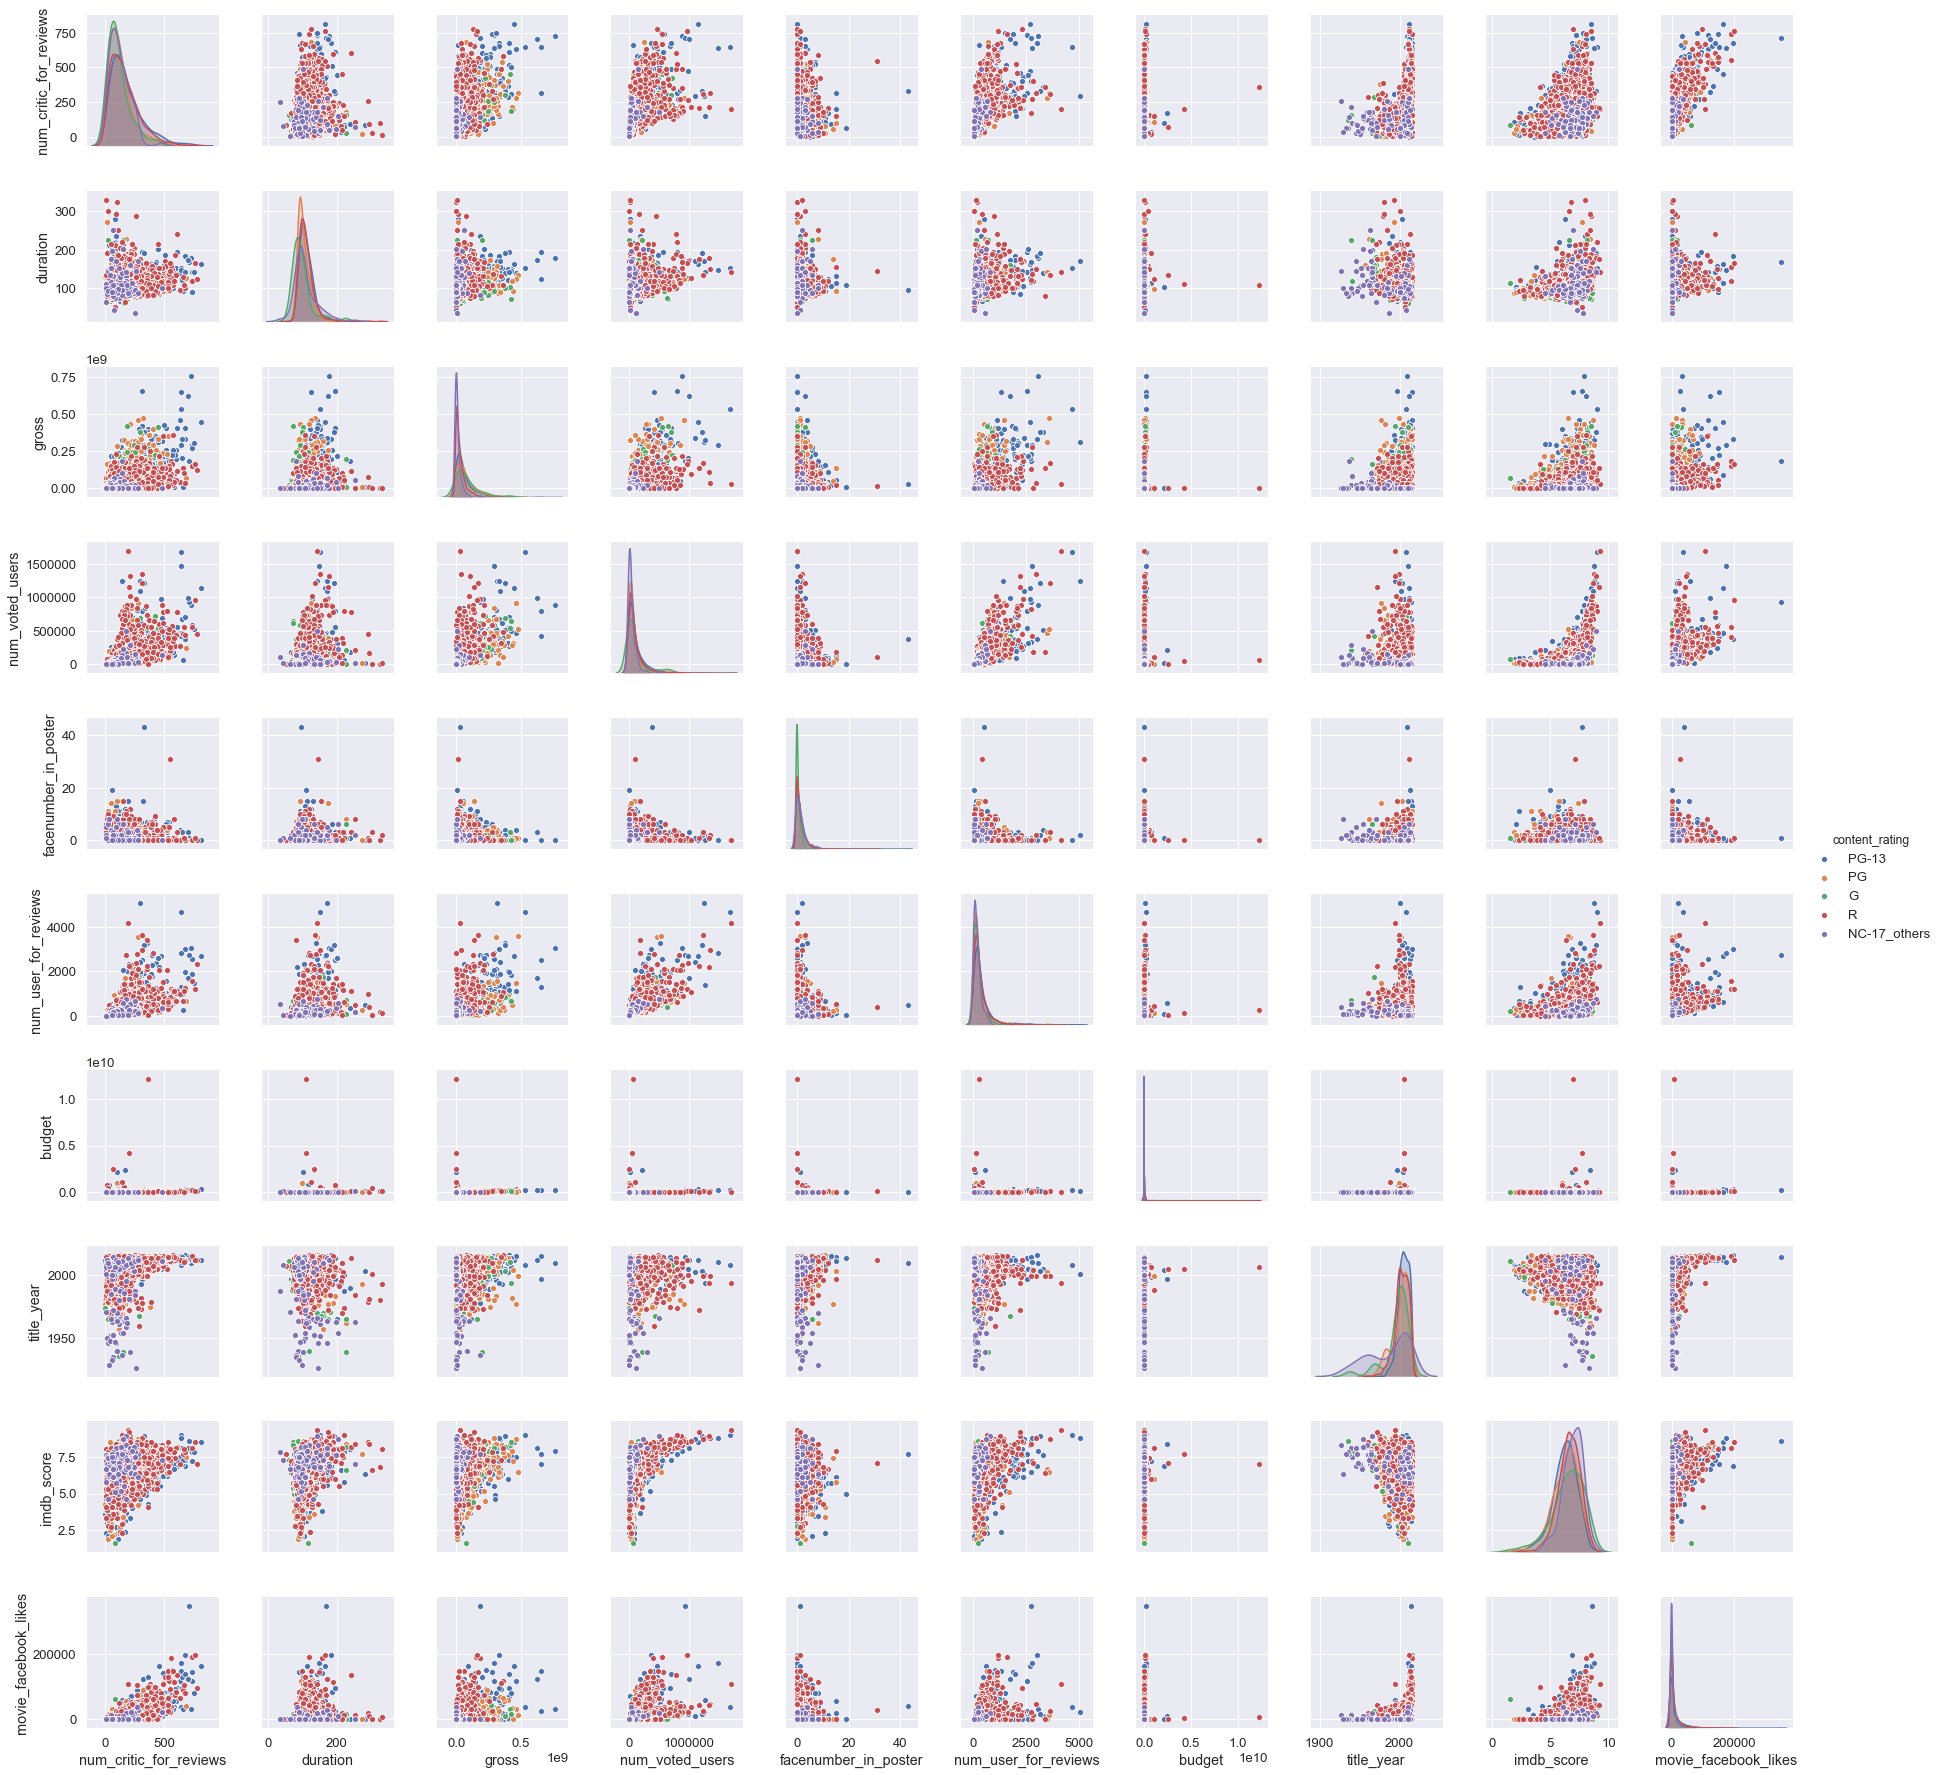

In [15]:
sns.set(font_scale=1.2)
sns.pairplot(movie_df, vars=num_columns, hue='content_rating')

Starting from the top, 'num_critic_for_reviews' seems to have a slight linear relationship with 'movie_facebook_likes'. 'duration' and 'gross' do not seem to have any relationship with the others from the plots. 'num_voted_users' has a positive relationship with 'num_user_for_reviews', suggesting that users who voted are likely to comment reviews too. 'facenumber_in_poster' is an interesting feature looking into but it does not look like having to do with other features, and most of them are 1 face or 2 from the histogram. 'budget' is also very widely laid, not having a relationship. 'title_year' might have some relationship with 'num_critic_for_reviews' and 'imdb_score' when it comes to the rating 'R', red dots. 'imdb_score' is interesting in that it has some relationship with most of the others. Scores increase as a feature gets larger, but its score range gets smaller. Lastly, 'movie_facebook_likes' has the relationship with 'num_critic_for_reviews' as already found, and no other than that.

* 'num_critic_for_reviews' vs. 'movie_facebook_likes': *positive linear*
* 'num_voted_users' vs. 'num_user_for_reviews': *positive linear*
* 'num_critic_for_reviews' vs. 'imdb_score': *light positive linear*
* 'duration', 'gross', 'facenumber_in_poster', 'budget': *seemingly no relationship with any*

However, the pair plot should be understood as a method to get an overall idea, therefore, the correlations need to be seen in some other way that is more precise. Here comes a heat map to play for the role.

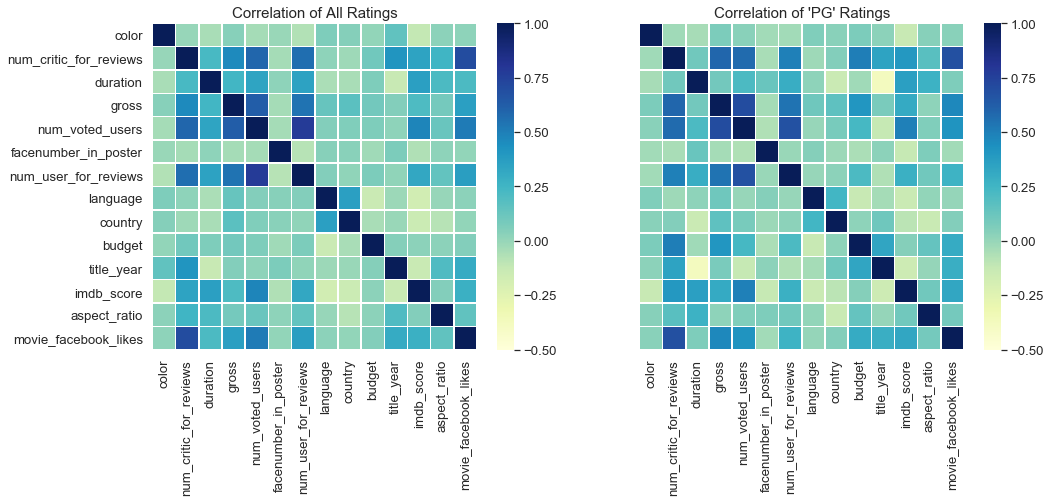

In [16]:
#plt.figure(figsize=(8, 7))
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axes[0].set_title("Correlation of All Ratings", fontsize = 15)
sns.heatmap(movie_df.corr(), cmap="YlGnBu", 
            linewidth=0.5, vmin=-0.5, vmax=1, ax=axes[0])

axes[1].set_title("Correlation of 'PG' Ratings", fontsize = 15)
sns.heatmap(movie_df[movie_df['content_rating'] == 'PG'].corr(), cmap="YlGnBu", 
            linewidth=0.5, vmin=-0.5, vmax=1, ax=axes[1])

plt.show()

The heat maps are slightly different in color, which means they have different correlations among the features. Even though the differences are not fundamentally distinctive when looking into the patterns, there are some correlations that are quite unique in one heat map. These special relationships will be revealed in the following analysis part. Ahead of that, I like to handle outliers that were found on the pair plots.

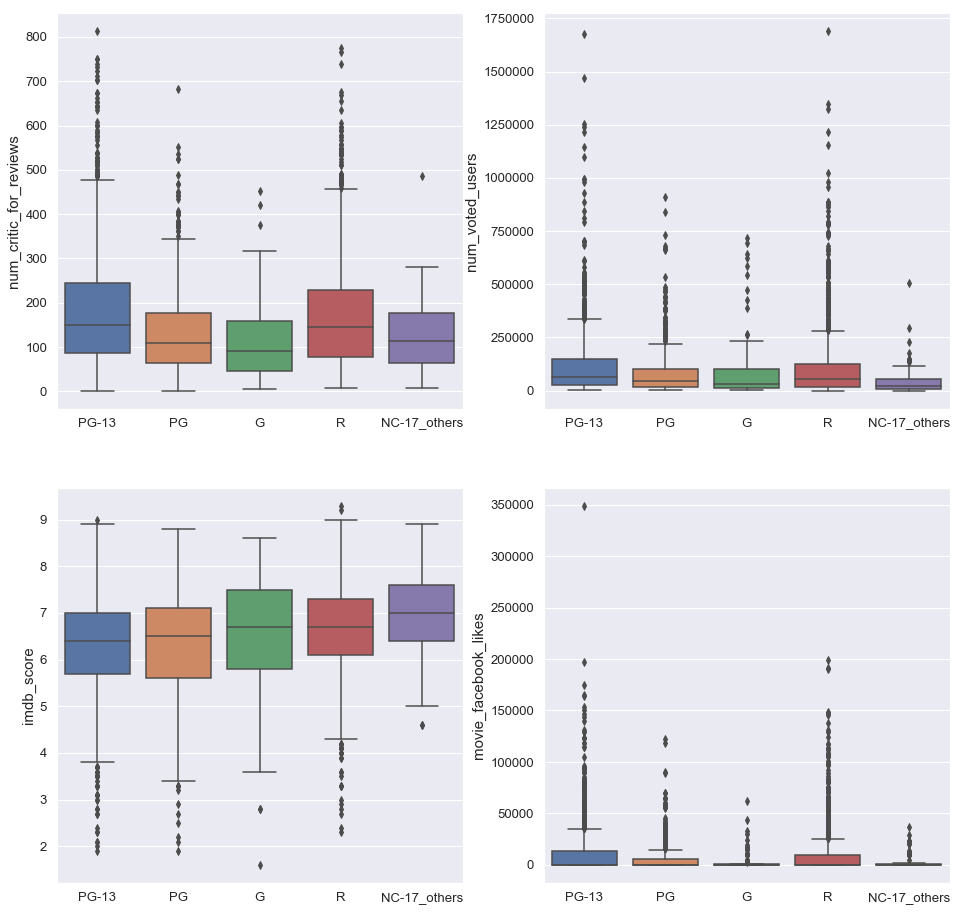

In [17]:
"""
Draw boxplots for the selected numerical columns.
"""
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

selected_columns = ['num_critic_for_reviews', 'num_voted_users', 
                    'imdb_score', 'movie_facebook_likes']

for i in range(0, 2):
    for j in range(0, 2):
        col = selected_columns[i*2+j]
        sns.boxplot(x='content_rating', y=col, data=movie_df, ax=axes[i,j])
        axes[i, j].set_xlabel("")
        axes[i, j].set_ylabel(col, fontsize=15)

plt.show()

Box plot is a great use for quickly and easily checking a distribution and basic statistics at the same time. 'num_critic_for_reviews' and 'imdb_score' do not seem to be seriously skewed, on the contrary, 'num_voted_users' and 'movie_facebook_likes' are. As seen on the pair plots, they are positively skewend, having lots of big outliers. The same goes to 'gross', 'num_user_for_reviews', and 'budget'.

------
### Consider Outliers
One thing to be very cautious of is that outliers might contribute to correlations. To explain this, let's recall that majority of the distributions on the pair plots were skewed mostly positively. First thing coming to my mind is remove their right tails as outliers. However, I decide not to do that because again *majority* of them are skewed so. To cut outliers off, I will need to set some cutting point like a sigma or a quantile and this might differently work against the five content ratings. If this job will not be done very precisely, the correlations would get confused. In conclusion, I do not see the need of outlier removal when they are similarly distributed.

In [18]:
movie_df[num_columns].skew()

num_critic_for_reviews     1.424310
duration                   2.398417
gross                      3.030529
num_voted_users            3.652534
facenumber_in_poster       4.951016
num_user_for_reviews       3.846560
budget                    44.196750
title_year                -2.098027
imdb_score                -0.723759
movie_facebook_likes       4.519336
dtype: float64

For example, there are two features and both are highly skewed in the same direction. If they are shaped almost the same, however, the correlation between them should be higher when with outliers. Reversely, if the outliers were to be removed, that would only mean loss of information, possibly resulting in less correlation. More information about skewness can be found [here](https://help.gooddata.com/display/doc/Normality+Testing+-+Skewness+and+Kurtosis) for the reference.

In [19]:
print("Final row x columns:", movie_df.shape)

Final row x columns: (3761, 15)


------
### Analyze Correlation

In [20]:
"""
Create the correlation table for the given content rating and
loop through each value once to check if larger than or equal to 0.7.
If so, then write the attribute set and the value.
"""
def corr_filter(content_rating):
    corr_df = movie_df[movie_df['content_rating'] == content_rating].corr()
    col_names = list(corr_df.columns)
    corr_dict = {}
    
    for col in col_names:
        idx = col_names.index(col)
        for row in col_names[idx+1:]:
            key = (col, row)
            val = round(corr_df[col].loc[row], 2)
            if abs(val) > 0.69:
                corr_dict[key] = val
                
    corr_dict = [(k, corr_dict[k]) for k in sorted(corr_dict, key=corr_dict.get, reverse=True)]
    return corr_dict    

First, the rating "G" has a highly correlated features 'gross' and 'num_voted_users'. In fact, I mentioned that 'gross' did not seem to have such relationship with any features on the pair plots where things would not look in detail. There are five other features that have a correlation coefficient over 0.7. Especially, 'num_critic_for_reviews' appears four of them.

In [21]:
corr_filter("G")

[(('gross', 'num_voted_users'), 0.82),
 (('num_voted_users', 'num_user_for_reviews'), 0.8),
 (('num_critic_for_reviews', 'num_voted_users'), 0.74),
 (('num_critic_for_reviews', 'gross'), 0.72),
 (('num_critic_for_reviews', 'num_user_for_reviews'), 0.71),
 (('num_critic_for_reviews', 'budget'), 0.71)]

Next, the rating "PG" has only one pair 'gross' and 'num_voted_users', which is the highest of the rating "G" but the coefficient is a little smaller here.

In [22]:
corr_filter("PG")

[(('gross', 'num_voted_users'), 0.7)]

The rating "PG-13" has four pairs and two of them are very similar with the first two of the rating "G". However, the third is an unseen pair 'num_critic_for_reviews' and 'movie_facebook_likes'. The fourth is another 'gross' feature appearing, paired with 'num_user_for_reviews'.

In [23]:
corr_filter("PG-13")

[(('num_voted_users', 'num_user_for_reviews'), 0.8),
 (('gross', 'num_voted_users'), 0.78),
 (('num_critic_for_reviews', 'movie_facebook_likes'), 0.72),
 (('gross', 'num_user_for_reviews'), 0.7)]

Even though the rating "R" has the most observations, it has only two high correlations. 'num_voted_users' and 'num_user_for_reviews' is already seen twice in "G" and "PG-13", and 'num_critic_for_reviews' and 'movie_facebook_likes' is too seen in "PG-13".

In [24]:
corr_filter("R")

[(('num_voted_users', 'num_user_for_reviews'), 0.79),
 (('num_critic_for_reviews', 'movie_facebook_likes'), 0.7)]

Lastly, "NC-17_others" is not too special, having only one correlation feature set, which now seems like almost every rating has.

In [25]:
corr_filter("NC-17_others")

[(('num_voted_users', 'num_user_for_reviews'), 0.8)]

The followings are what I can say after putting them together.

* 'num_voted_users' vs. 'num_user_for_reveiws': strongly correlated regardless of ratings except for "PG"
* 'gross' vs. 'num_voted_users': only appearing in "G", "PG", "PG-13" and the sole pair for "PG"
* 'num_critic_for_reviews' vs. 'movie_facebook_likes': only appearing the top 2 most ratings, "R" and "PG-13"

------
### Analyze Categorical Attributes

In [26]:
"""
Bring categorical variables and 
calculate 0 to 1 ratio for each content rating.
"""
content_rating = ["G", "PG", "PG-13", "R", "NC-17_others"]
cate_dict = {}
cate_dict['content_rating'] = content_rating

for col in cate_columns:
    values = []
    for rating in content_rating:
        series = movie_df[movie_df['content_rating'] == rating][col]
        ratio = len(series[series == 1])/len(series)
        values.append(ratio)
    cate_dict[col] = values

cate_df = pd.DataFrame(cate_dict)
cate_df

,content_rating,color,language,country,aspect_ratio
0,G,0.988764,0.955056,0.786517,0.292135
1,PG,0.973638,0.982425,0.817223,0.456942
2,PG-13,0.977082,0.976318,0.838044,0.620321
3,R,0.964139,0.944150,0.768372,0.523222
4,NC-17_others,0.817204,0.806452,0.559140,0.354839


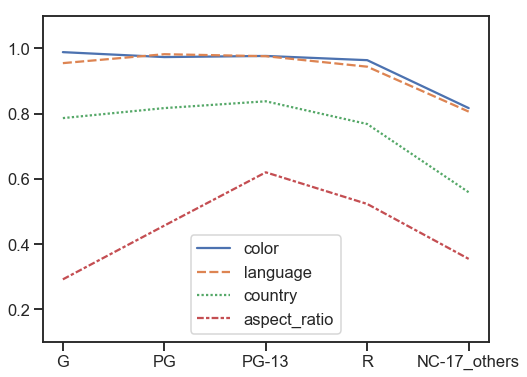

In [27]:
sns.set(context="talk", style="ticks")
plt.figure(figsize=(8,6))

ax = sns.lineplot(data=cate_df[cate_columns])
ax.set_xlim(-0.2,4.2)
ax.set_ylim(0.1,1.1)
ax.set(xticks=range(0, 5), xticklabels=cate_df['content_rating'])

plt.show()

Except for 'aspect_ratio', the rest are showing a similar pattern that they remain the highest from "G" to "PG-13 and then gradually drop through "R" to "NC-17_others". Recalling that 'aspect_ratio' equal to '0' means averagely 1.85 and '1' means averagely 2.35, the rating "G" is mostly 1.85 aspect ratio. This is not surprising because usually children movies are thought to play on not that wide a screen. The same can explain for "PG". The ratio goes up at "PG-13" and "R" and drops at "NC-17_others".

* 'color', 'language': almost all filmed in color and English for all the ratings but "NC-17_others"
* 'country': around 80% of USA and 60% for "NC-17_others"
* 'aspect_ratio': 1.85 or similar for "G", "PG", "NC-17_others" and 2.35 or similiar for "PG-13" and "R"
* "NC-17_others": considred to have old movies that were filmed in black and white, in diverse countries, with narrower aspect ratio

------
### Analyze Dependent Variable

For an extra analysis, I like to convert content ratings into integers. This should be categorical by definition, but it could be understood as a vector in a way since the ratings are based on age where a certain order exists. The goal of doing this is know if there is any correlation with other features, just as I did to categorical attributes by labeling them with '0' or '1'.

In [28]:
# map content ratings with integer 1 ~ 5
movie_df['content_rating'] = movie_df['content_rating'].map(dict(zip(content_rating, list(range(1, 6)))))

In [29]:
movie_df.corr()['content_rating']

color                    -0.071660
num_critic_for_reviews    0.057224
duration                  0.088482
gross                    -0.279287
num_voted_users          -0.002322
facenumber_in_poster      0.017643
num_user_for_reviews      0.033614
language                 -0.102755
country                  -0.078939
content_rating            1.000000
budget                   -0.038460
title_year               -0.053868
imdb_score                0.140736
aspect_ratio              0.019947
movie_facebook_likes      0.004533
Name: content_rating, dtype: float64

It turns out that most of them are not correlated at all, while 'budget' and 'gross' appear to have light negative relationships. In short, the bigger budget is put into and the larger gross is earned, the more chance it is rated lower. This could be limitedly true, imagining how many movies rated "NC-17_others" would be made into successful blockbusters. However, it could be a bit odd if the same question is asked to other ratings because most of large-sized movies are commonly "PG-13" or "R", not "G" or "PG".

------
### Conclusion
I investigated the movie data in the sense of numerical and categorical attributes in order to explore the data and see how the data are laid out and how they are related. As for the numerical variables, I found that 'num_xxx' type attributes are usually correlated with each other. I think this is because they vote and also leave reviews. For example, it would be a bit strange if a movie has a lot of reviews but a small number of votes. Another interesting point is 'gross' feature seems to be sensitive to movies for children. Similarly, 'movie_facebook_likes' is sensitive to movies rated "PG-13" or "R" which are the most popular ratings. As for the categorical variables, 'aspect_ratio' shows distinctive differences for each of the 5 ratings. The others show the coupled trend that stays the same but for "NC-17_other" and I believe this is because the rating contains old movies and some rare movies. Lastly, the conversion of dependent varable to integer values, 'content_rating', only proved that the ratings can be distinguished by correlations of other feature combined, not by themselves showing no effect.

* People who Vote also Leave Reviews
* Gross USD of Children Movies have a strong Relationship with number of Votes
* Facebook likes of Movies Not for Children are Correlated with number of Critics for Reviews